In [12]:
import os
import pandas as pd
from more_itertools import flatten

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# see plt.style.available

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 4

rcParams['font.weight'] = 300

import seaborn as sns
sns.set_context("notebook", font_scale=1.3)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
os.chdir("..")

In [14]:
PATH_ROOT = os.getcwd()
PATH_TO_FIGS = PATH_ROOT + '/reports/figures/'

In [15]:
from src.data.obtain import get_raw_data
from src.data.scrub import scrub_raw_data

In [16]:
if not os.path.exists('data/04-processed/titanic.csv'):
    print("Importing and scrubbing raw data.")
    df_raw = get_raw_data()
    df = scrub_raw_data(df_raw)
else:
    print("Retrieving cleaned data from backup.")
    df = pd.read_csv('data/04-processed/titanic.csv')

Importing and scrubbing raw data.


In [17]:
df.head()

,survived,age,sibsp,parch,fare,age__is_null,cabinnumber__is_null,gender,embarked_C,embarked_Q,embarked_S,pclass_1,pclass_2,pclass_3
0,1,29.0000,0,0,211.3375,0,0,1,0,0,1,1,0,0
1,1,0.9167,1,2,151.5500,0,0,0,0,0,1,1,0,0
2,0,2.0000,1,2,151.5500,0,0,1,0,0,1,1,0,0
3,0,30.0000,1,2,151.5500,0,0,0,0,0,1,1,0,0
4,0,25.0000,1,2,151.5500,0,0,1,0,0,1,1,0,0


## Explore

- Univariate (distributions)
- Bivariate (correlations)
- By-group analysis
- Feature Engineering
- Feature Selection

In [18]:
y = df['survived'].copy()
print("Average Survival Rate: {}%".format(y.mean().round(3) * 100))

Average Survival Rate: 38.2%


In [29]:
rcParams['font.family'] = ['Lucid']

/miniconda/envs/ds-env/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'Lucid'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


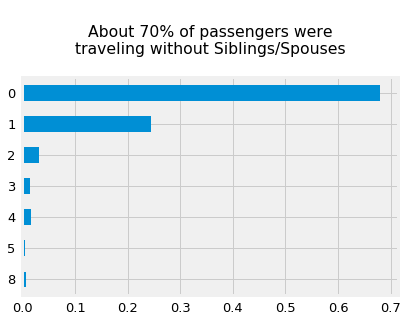

In [30]:
(df['sibsp']
 .value_counts(normalize=True)
 .sort_index(ascending=False)
 .plot.barh(title="\nAbout 70% of passengers were\ntraveling without Siblings/Spouses\n"));

In [31]:
df['sibsp_2'] = df['sibsp'].map(lambda i: 2 if i >= 2 else i)

In [21]:
df.groupby('sibsp_2')['survived'].mean()

sibsp_2
0    0.346801
1    0.510972
2    0.282828
Name: survived, dtype: float64